-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

<div style="text-align: justify">

# 02 - Clustering K-medias
por [Ignacio Sarmiento Barbieri](https://ignaciomsarmiento.github.io/) y [Lucas Gómez Tobón]()

## 1. Contexto del aprendizaje no supervisado
En otras clases probablemente habrá aprendido metodologías para predecir los resultados de una variable $Y=(Y_1, Y_2, \cdots, Y_N)$ a partir de un conjunto de predictores $X^T=(X_1, X_2, \cdots, X_p)$. Típicamente a este tipo de ejercicios se les conoce con el nombre de "aprendizaje supervisado" o "aprendizaje con profesor" pues metafóricamente el estudiante presenta una respuesta $\hat{y_i}$ para cada $x_i$ en la muestra de entrenamiento y el profesor revela la respuesta correcta y el error asociado a la respuesta del estudiante. Este error se caracteriza con una función de pérdida $L(y, \hat{y})$ como por ejemplo: $L(y, \hat{y}) = (y-\hat{y})^2$.

Suponiendo que $(X, Y)$ son variables aleatorias representadas por alguna función de densidad conjunta $Pr(X,Y)$, el aprendizaje supervisado puede ser formalmente caracterizado como un problema de estimación de densidad en donde nos interesa enfocarnos en las propiedades de la densidad condicional $Pr(Y|X)$. 
$$Pr(X,Y)=Pr(Y|X)\cdot Pr(X)$$
En donde $Pr(X)$ es la distribución marginal conjunta de los valores de $X$. En el caso del aprendizaje supervisado la $Pr(X)$ no es de mayor importancia. Sin embargo, para los problemas de esta clase, los problemas de aprendizaje no supervisado, nuestro objetivo será inferir directamente las propiedades de $Pr(X)$ sin la ayuda de un profesor o supervisor que señale la respuesta correcta o el grado de error para cada observación $i$. Por tal motivo, es difícil cuantificar la calidad de los resultados de estos métodos.

## 2. Análisis de clústeres.
El análisis de clústeres (también llamado segmentación de datos) es una de las principales aplicaciones de los algoritmos de aprendizaje no supervisado y consiste dividir las observaciones de un conjunto en un número $m$ de grupos de tal manera que todos los puntos dentro de un mismo grupo estén más estrechamente relacionados entre sí que los puntos asignados a diferentes grupos. 

Note que un concepto central en todo análisis de clústeres es la noción de similaridad o disimilaridad entre observaciones la cual podrá variar según las decisiones del desarrollador. Existen algunas guías para escoger una adecuada medida de distancia, sin embargo, existe un buen grado de subjetividad en la escogencia de estas (de algún modo esto se asemeja a la elección de la función de pérdida para el caso de aprendizaje supervisado). Por tal motivo, echaremos un vistazo sobre los fundamentos de las métricas de distancia antes de pasar por los algoritmos en sí.

## 3. Medidas de distancia o disimilaridad.
### 3.1. Matrices de proximidad o disimilaridad.
Muchas veces los datos son presentados directamente en términos de proximidad entre pares de objetos. Este tipo de datos generalmente se representa en una matriz $D$ de tamaño $N\times N$ en donde $N$ es el número de objetos y cada elemento $d_{ij}$ corresponde a la proximidad entre el objeto $i$ y el objeto $j$. En muchos casos esta matriz se usa como entrada en los algoritmos de clustering.

La mayoría de algoritmos suponen que la matriz de disimilaridad debe ser no negativa y con ceros en la diagonal (es decir que la distancia de un objeto a si mismo es 0). En todo caso, se pueden transformar las medidas de disimilaridad a similaridad (o viceversa) a partir de una transformación monótona creciente (decreciente). Adicionalmente es usual que se suponga que la matriz $D$ sea simétrica, por lo que si originalmente esta no lo es, se puede reemplazar por $(D+D^T)/2$.

En un sentido estricto, las disimilaridades son rara vez una medida de distancia pues no satisfacen la desigualdad triangular $d_{ij}\leq d_{ik} + d_{jk}$, para todo $k\in\{1, \cdots, N\}$. Por tal motivo, algunos algoritmos no permiten usar esta matriz como entrada.
### 3.2. Disimilaridad basada en atributos.
Más a menudo nos encontramos que cada objeto $X_{i}$ es medido en más de una variable $j=1,2,\cdots,p$. Por ende, para estimar la matriz de disimilaridad se debe encontrar primero la distancia entre pares de observaciones. 

Para tal fin definimos la disimilaridad $d_j(x_{ij}, x_{i'j})$ entre los valores del atributo $j$ y luego la disimilaridad entre objetos $i$ y $i'$ como:
$$D(x_i,x_j)=\sum_{j=1}^p d_j(x_{ij}, x_{i'j})$$

Entre las medidas de distancia más comunes se encuentra la distancia al cuadrado: $d_j(x_{ij}, x_{i'j}) = (x_{ij} - x_{i'j})^2$. No obstante, otras opciones son posibles y son potenciales de encontrar resultados diferentes. Para atributos no cuantitativos (como las variables categóricas) la distancia al cuadrado no es apropiada. Adicionalmente, en algunos contextos es deseable otorgarle un peso diferenciado a cada uno de los atributos a la hora de computar la distancia.

A continuación se muestran otro tipo de distancias según el tipo de variables:
#### Para variables cuantitativas. 
Las variables cuantitativas son aquellas en las que su dominio es un continuo de números reales. Es usual definir el error entre ellas como una función monótona creciente del valor absoluto de su diferencia:
$$d(x_i, x_{i'})=l(|x_i, x_{i'}|)$$
Alternativamente, los algoritmos de clustering también pueden estar basados en la correlación:
$$\rho(x_i, x_{i'})=\frac{\sum_j (x_{ij}-\bar{x_i})(x_{i'j}-\bar{x_{i'}})}{\sqrt{\sum_j (x_{ij}-\bar{x_i})^2\sum_j(x_{i'j}-\bar{x_{i'}}^2)}}$$
En donde $\bar{x_i}=\sum_j x_{ij}/p$. Note que el promedio es sobre las variables y no sobre las observaciones. Si se estandarizan antes las observaciones, entonces $\sum_j (x_{ij}-x_{i'j})^2 \propto 2(1-\rho(x_i, x_{i'}))$. Por esto los clusteres basados en la correlación (similaridad) son equivalentes a los clusteres basados en la distancia al cuadrado (disimilaridad).

#### Para variables ordinales.
Este tipo de variables usualmente se representa como un continuo de enteros y el dominio de estos es considerado un conjunto ordenado. Las medidas de error para variables ordinales son generalmente definidas reemplazando su valor $M$ original con:
$$\frac{i-1/2}{M},\ i=1,\cdots,M$$
En el orden prescrito de sus valores originales. Luego se tratan como variables cuantitativas en esta escala.

#### Para variables categóricas.
Para variables categóricas no ordenadas (también llamadas variables nominales), el grado de diferencia entre pares de observaciones debe ser determinado de forma explicita. Si la variable tiene $M$ valores posibles, estos pueden ser ordenados en una matriz no negativa, simétrica y con diagonal cero de tamaño $M\times M$. La elección más común es tener $L_{rr'} = 1$ para todo $r\neq r'$ aunque pesos diferenciados pueden ser usados para enfatizar que unos errores pesan más que otros.

### 3.3. Disimilaridad entre objetos.
Ahora definimos una forma para combinar las $p$ medidas de disimilaridades individuales entre atributos $d_j(x_{ij}, x_{i'j})$ en una sola medida de disimilaridad entre objetos $D(x_i, x_{i'})$. Esto casi siempre a partir de un promedio ponderado o combinación convexa:
$$D(x_i, x_{i'})=\sum_{j=1}^p\omega_j\cdot d_j(x_{ij}, x_{i'j});\ \sum_{j=1}^p\omega_j=1$$
Note que $\omega_j$ es el peso asignado al atributo j-ésimo. La escogencia de estos pesos partirá enteramente de criterios subjetivos.
Además es importante recalcar que pesos iguales no necesariamente conlleva a que todos los atributos tengan la misma influencia, por ejemplo $\omega_j=1\ \forall j$. La influencia del atributo j-ésimo $X_j$ en la disimilaridad entre dos objetos depende en su contribución relativa al promedio de disimilaredes entre todos los puntos de un conjunto de datos:
$$\bar{D}=\frac{1}{N^2}\sum_{i=1}^N\sum_{i'=1}^N D(x_i, x_{i'})=\sum_{j=1}^p\omega_j \cdot \bar{d_j}$$
Con $\bar{d_j}=\frac{1}{N^2}\sum_{i=1}^N\sum_{i'=1}^N d_j(x_{ij}, x_{i'j})$ siendo la disimilaridad promedio del atributo $j$. Por consiguiente, la influencia relativa de la variable j-ésima es $\omega_j \cdot \bar{d_j}$ y definiendo $\omega_j \sim 1/\bar{d_j}$ se consigue que todos los atributos aporten lo mismo a la disimilaridad.

Por ejemplo, si se tienen $p$ variables cuantitativas y se define el error al cuadrado como medida de distancia para cada coordinada, obtenemos la distancia euclidiana al cuadrada ponderada por pesos:
$$D_I(x_i, x_{i'})=\sum_{j=1}^p\omega_j\cdot (x_{ij}-x_{i'j})^2$$

Note que $\bar{d_j}=\frac{1}{N^2}\sum_{i=1}^N\sum_{i'=1}^N (x_{ij}-x_{i'j})^2=2\cdot var_j$ en donde $var_j$ es la varianza muestral de $X_j$. Luego, la importancia relativa de cada variable es proporcional a la varianza de esta en el conjunto de datos. <font color='red'> Esto es tan bonito que podríamos sacarlo de acá y ponerlo en un quiz/problem set o algo así</font>.

<font color='red'> Nota para mi yo del futuro. Hacer ejemplo con datos generados para mostrar el problema de poner todos los features con el mismo peso! pg. 525 del Elements</font>.

## 4. Tipos de clustering.
En términos generales podemos dividir los algoritmos de clustering en tres categorías:

- **Algoritmos combinatorios**: estos trabajan directamente sobre los datos sin suponer ninguna distribución generadora de la información.

- **Algoritmos de mezclas**: estos suponen que los datos son una muestra $i.i.d.$ de alguna población descrita por una función de densidad. El mecanismo generador de los datos se ajusta a partir del enfoque de Máxima Verosimilitud o algún otro enfoque bayesiano.

- **Algoritmos de busqueda de moda**: estos adoptan una perspectiva no paramétrica, intentando estimar directamente modos distintos de la función de densidad de probabilidad. Las observaciones "más cercanas" a cada modo respectivo luego definen los grupos individuales.

# K-Medias
El algoritmo de k-medias es un algoritmos de clustering de descenso iterativo. Este se usa cuando todas las variables en el conjunto de datos son numéricas y se utiliza la distancia euclidiana cuadrática para definir la disimilaridad entre observaciones:
$$d(x_i, x_{i'})=\sum_{j=1}^p(x_{ij}-x_{i'j})^2=||x_i-x_{i'}||^2$$
En este caso particular la función de pérdida a minimizar para garantizar que los puntos más cercanos entre sí estén dentro de un mismo segmento es:
$$W(C)=\frac{1}{2}\sum_{k=1}^K\sum_{C(i)=k}\sum_{C(i')=k}||x_i-x_{i'}||^2$$
$$=\sum_{k=1}^K N_k\sum_{C(i)=k}||x_i-\bar{x_{k}}||^2$$
En donde $\bar{x_{k}}=(\bar{x_{1k}}, \cdots, \bar{x_{pk}})$ es el vector de medias asociado al clúster k-ésimo y $N_k=\sum_{i=1}^N(C(i)=k)$.
Por tal motivo, el criterio se minimiza asignando las $N$ observaciones a los $K$ conglomerados de tal manera que dentro de cada conglomerado se minimiza la disimilitud promedio de las observaciones a la media del conglomerado, según lo definido por los puntos en ese conglomerado.
El algoritmo de descenso iterativo para resolver:
$$C^*=\min_C\sum_{k=1}^K N_k \sum_{C(i)=k} ||x_i-\bar{x_k}||^2$$
Puede ser obtenido entendiendo que para cualquier subconjunto de observaciones $S$:

$$
    \bar{x_s}=\argmin_m \sum_{i\in S} ||x_i - m||^2
$$ 

Por tanto, podemos obtener $C^∗$ resolviendo el problema de optimización ampliado:
$$ \min_{C, \{m_k\}_1^K} \sum_{k=1}^K N_k \sum_{C(i)=k} ||x_i-\bar{m_k}||^2 $$

Para minimizar la expresión pasada se usa el siguiente algoritmo: 
1. Para una determinada asignación de conglomerados $C$, la varianza total de los conglomerados se minimiza con respecto a $\{m_1, \cdots , m_K\}$ obteniendo las medias de los conglomerados asignados actualmente $\bar{x_s}=\argmin_m \sum_{i\in S} ||x_i - m||^2$.
2. Dado un conjunto actual de medias $\{m_1, \cdots , m_K\}$, la varianza total de los conglomerados se minimiza asignando cada observación a la media del conglomerado más cercana. Es decir,
$$C(i)=\argmin_{1\leq k \leq K} ||x_i-m_k||^2$$
3. Se repiten los pasos 1 y 2 hasta que las asignaciones no cambien.

Cada uno de los pasos 1 y 2 reduce el valor de la varianza total de los conglomerados, por lo que la convergencia está asegurada. Sin embargo, el resultado puede representar un mínimo local subóptimo. Por ende se recomienda iniciar el algoritmo con varias opciones aleatorias diferentes para las medias iniciales y elegir la solución que tenga el valor más pequeño de la función objetivo.

Para facilitar la comprensión, se hará un ejemplo de como funciona este algoritmo paso a paso. En resumen, se hará el siguiente proceso:
1. Se definirá el número de clústeres $k$ que se desean encontrar en los datos.
2. Se escogerán $k$ centroides al azar a partir del conjunto de datos.
3. Se calculará la distancia euclideana entre cada observación a cada uno de los centroides.
4. A cada observación se le asignará el clúster más cercano.
5. Se recalcularán $k$ nuevos centroides como la media de cada cluster. 
6. Se repetirá el proceso desde el paso 3 hasta que ninguna observación cambie de clúster.

Antes de comenzar con el algoritmo, vamos a generar ciertos datos aleatorios a partir de la función `make_blobs` de la librería `sklearn`.

In [11]:
from sklearn.datasets import make_blobs
# Creamos una base de 100 observaciones y 2 columnas. El mecanismo generador de los datos generará
# 5 centroides al azar y luego construirá observaciones al rededor de estos a partir de una 
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 666)

A continuación presentaremos un diagrama de dispersión de las variables de nuestra base. Note que los centroides 0 y 1 están muy cerca uno del otro por lo que los puntos generados al rededor de estos se entremezclan entre sí.

NameError: name 'g_puntos' is not defined

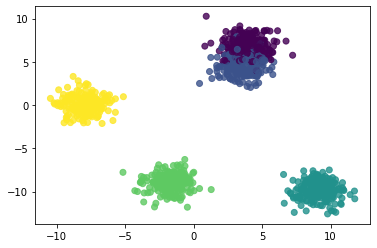

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g = plt.scatter(X[:,0], X[:,1], c = y + 1, alpha = 0.8)
legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\nteóricos")
ax.add_artist(legend)
plt.show()

El primer paso para realizar la segmentación por K-medias es definir $K$. ¿Cuántos segmentos deseamos encontrar en nuestros datos? Lo ideal es evaluar un rango de posibilidades y luego escoger el $K$ que maximice algún criterio de calidad de clusteres (como el negativo de la varianza intracluster). Por ahora, veamos qué sucede si escogemos $K=4$.

Una vez que escogimos que $K=4$ para nuestro ejemplo, el paso a seguir es escoger 4 centroides al azar a partir del conjunto de datos.

In [403]:
import numpy as np
import random as rd

K = 4 # Número de clústeres a encontrar
n_observaciones = X.shape[0] # Número de observaciones
n_variables = X.shape[1] # Número de columnas en la base
# Definimos un array vacío para alojar los centroides
centroides = np.array([]).reshape(n_variables, 0) 
rd.seed(666) # Semilla para garantizar la replicabilidad de los resultados
for k in range(K):
    # Se escoge aleatoriamente una observación
    indice = rd.randint(0, n_observaciones - 1)
    centroides = np.c_[centroides, X[indice]]

Ahora que tenemos los centroides definidos, vamos a calcular la distancia de las observaciones a cada uno de estos puntos y luego a asignarle a cada observación el clúster más cercano.

In [9]:
distancias = np.array([]).reshape(n_observaciones, 0)
for k in range(K):
    distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
    distancias = np.c_[distancias, distancia]
clusteres = np.argmin(distancias, axis = 1) + 1

NameError: name 'np' is not defined

Veamos gráficamente como va la cosa.

NameError: name 'clusteres' is not defined

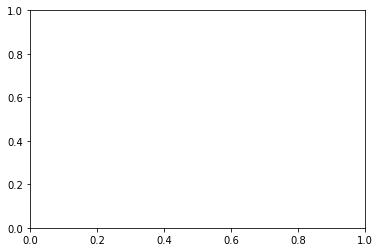

In [10]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()

g = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)
legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración 1")
ax.add_artist(legend)

g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
plt.legend([g_centroides], ["Centroides"], loc = "upper left")

plt.show()

Ahora vamos a re-calcular los nuevos centroides de cada cluster para re asignar los clusteres. Este proceso se hará de forma iterativa hasta que ninguna observación cambie de cluster.

In [406]:
# Vamos a reorganizar nuestras observaciones
# Creamos un diccionario en donde vamos a poner cada uno de los clusteres
Y = {}
for k in range(K):
    Y[k+1] = np.array([]).reshape(2,0)
# Cada observación se asigna a su correspondiente cluster en el diccionario
for i in range(n_observaciones):
    Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
# Arreglamos formato
for k in range(K):
    Y[k+1] = Y[k+1].T
# Calculamos los nuevos centroides como la media del cluster
centroides_nuevos = np.array([]).reshape(n_variables, 0) 
for k in range(K):
    centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

A continuación se muestra como cambiaron los centroides. Los clusteres siguen siendo los mismos asignados previamente. Se puede ver que algunas observaciones van a cambiar de cluster dado que están ahora más cercanas a los nuevos centroides.

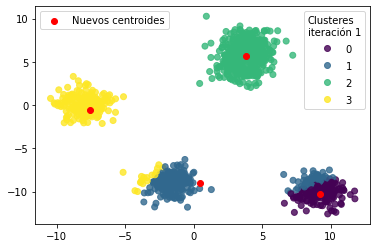

In [407]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()

g = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8)
legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración 1")
ax.add_artist(legend)

g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

plt.show()

Iteración 1


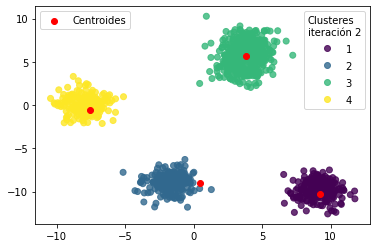

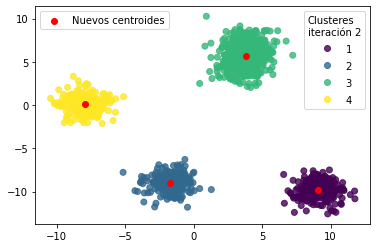

Iteración 2


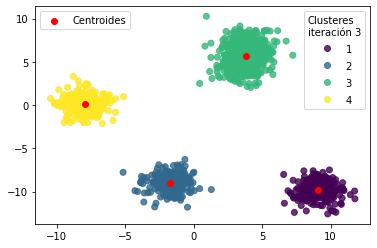

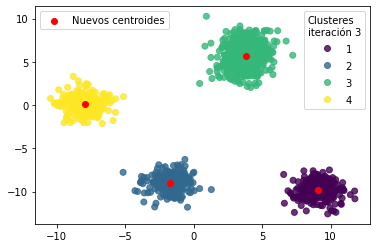

In [408]:
cambio = np.sum(centroides_nuevos - centroides) 
n = 0
while cambio != 0:
    n += 1
    print("Iteración", str(n))
    centroides = centroides_nuevos
    # Calculamos distancias y asignamos clusteres
    distancias = np.array([]).reshape(n_observaciones, 0)
    for k in range(K):
        distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
        distancias = np.c_[distancias, distancia]
    clusteres = np.argmin(distancias, axis = 1) + 1

    # Graficamos avance
    fig, ax = plt.subplots()

    g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
    legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
    ax.add_artist(legend)

    g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
    plt.legend([g_centroides], ["Centroides"], loc = "upper left")

    plt.show()

    # Re calculamos centroides
    Y = {}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(2,0)
    for i in range(n_observaciones):
        Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
    for k in range(K):
        Y[k+1] = Y[k+1].T
    centroides_nuevos = np.array([]).reshape(n_variables, 0) 
    for k in range(K):
        centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

    # Graficamos avances
    fig, ax = plt.subplots()

    g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
    legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
    ax.add_artist(legend)

    g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
    plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

    plt.show()
        
    cambio = np.sum(centroides_nuevos - centroides) 

Ahora se construirá una función que corra todo el proceso mostrado anteriormente y así podamos correr el algoritmo para diferentes $K$.

In [409]:
def kmedias(X, K, max_iter = 100, visualizar_proceso = True):
    n_observaciones = X.shape[0] # Número de observaciones de la base
    n_variables = X.shape[1] # Número de columnas en la base
    # Definimos un array vacío para alojar los centroides
    centroides = np.array([]).reshape(n_variables, 0) 
    rd.seed(666) # Semilla para garantizar la replicabilidad de los resultados
    for k in range(K):
        # Se escoge aleatoriamente una observación
        indice = rd.randint(0, n_observaciones - 1)
        centroides = np.c_[centroides, X[indice]]
    n = 0
    cambio = 1
    while cambio != 0:
        n += 1
        if n >= max_iter:
            break
        print("Iteración", str(n))
        # Calculamos distancias y asignamos clusteres
        distancias = np.array([]).reshape(n_observaciones, 0)
        for k in range(K):
            distancia = np.sum((X - centroides[:,k])**2, axis = 1) # Formula distancia euclideana
            distancias = np.c_[distancias, distancia]
        clusteres = np.argmin(distancias, axis = 1) + 1

        # Graficamos avance
        if visualizar_proceso:
            fig, ax = plt.subplots()

            g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
            legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
            ax.add_artist(legend)

            g_centroides = plt.scatter(centroides[0,:], centroides[1,:], color = "red", label = "Centroides")
            plt.legend([g_centroides], ["Centroides"], loc = "upper left")

            plt.show()

        # Re calculamos centroides
        Y = {}
        for k in range(K):
            Y[k+1] = np.array([]).reshape(2,0)
        for i in range(n_observaciones):
            Y[clusteres[i]] = np.c_[Y[clusteres[i]], X[i]]
        for k in range(K):
            Y[k+1] = Y[k+1].T
        centroides_nuevos = np.array([]).reshape(n_variables, 0) 
        for k in range(K):
            centroides_nuevos = np.c_[centroides_nuevos, np.mean(Y[k+1], axis = 0)]

        # Graficamos avances
        if visualizar_proceso:
            fig, ax = plt.subplots()

            g_puntos = plt.scatter(X[:,0], X[:,1], c = clusteres, alpha = 0.8, label = "Centroides")
            legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres\niteración " + str(n + 1))
            ax.add_artist(legend)

            g_centroides = plt.scatter(centroides_nuevos[0,:], centroides_nuevos[1,:], color = "red", label = "Centroides")
            plt.legend([g_centroides], ["Nuevos centroides"], loc = "upper left")

            plt.show()
            
        cambio = np.sum(centroides_nuevos - centroides) 
        centroides = centroides_nuevos
    return(clusteres)

**2 Clústeres**

![**2 Clústeres**](imagenes/k2.gif)

In [ ]:
clusteres_2 = kmedias(X, K = 2, visualizar_proceso = True)

**3 Clústeres**

![**3 Clústeres**](imagenes/k3.gif)

In [ ]:
clusteres_3 = kmedias(X, K = 3, visualizar_proceso = True)

**4 Clústeres**

![**4 Clústeres**](imagenes/k4.gif)

In [ ]:
clusteres_4 = kmedias(X, K = 4, visualizar_proceso = True)

**5 Clústeres**

![**5 Clústeres**](imagenes/k5.gif)

In [ ]:
clusteres_5 = kmedias(X, K = 5, visualizar_proceso = True)

**6 Clústeres**

![**6 Clústeres**](imagenes/k6.gif)

In [ ]:
clusteres_6 = kmedias(X, K = 6, visualizar_proceso = True)

Se habrá podido percatar de que este algoritmo es altamente dependiente del punto de inicialización de los centroides. Por tal motivo, se recomienda siempre correr el algoritmo más de una vez con diferentes puntos de partida y escoger la solución que maximice algun criterio de calidad de la segmentación. 

Para escoger el número óptimo de segmentos $K$, usaremos la librería `sklearn` la cual tiene la función para realizar k medias de manera automática. Acá enseñeremos dos criterios para la elección del número óptimo de clusteres: La gráfica de codo y el Coeficiente de Silhouette.

### Gráfica del codo
Para este método vamos a calcular la suma de los errores al cuadrado dentro cada clúster lo cual es una medida que suma la varianza de todos los clusteres. Idealmente queremos que esta varianza sea lo más pequeña posible.

Para saber cuál es el número de segmentos $K$ óptimo vamos a calcular esta suma de las varianzas intracluster para cada $K$ y las vamos a graficar. El gráfico resultante se le conoce como "Codo" porque en la medida que aumente $K$ se va a disminuir la varianza intra clúster. Idealmente deseamos encontrar el punto para el cuál un aumento en $K$ conlleva a una reducción despreciable en la métrica de desempeño. 

La desventaja de este método para seleccionar $K$ es que no existen criterios claros para saber hasta que punto una disminución marginal en la métrica de varianza es razonable o no. Por ende, los resultados pueden cambiar de investigador en investigador.

### Coeficiente de Silhouette
Un criterio más objetivo es el coeficiente de Silhouette pues este nos indica la calidad de los clústeres a partir de un índice que va de -1 a 1 en donde números más grandes corresponde con mejores segmentaciones.

El valor de Silhouette es igual a:
$$ s(i)= \frac{b(i)-a(i)}{\max\{a(i),b(i)\}},\ \text{si } |C_{i}|>1$$
En donde, para la observación $i$ en el grupo $C_ {i}$:
$$a(i)=\frac {1}{|C_{i}|-1}\sum _{j\in C_{i},i\neq j}d(i,j)$$
$$b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)$$

Por lo que podemos interpretar $a(i)$ como la distancia media entre $i$ y todos los demás puntos de datos en el mismo grupo, donde $|C_{i}|$ es el número de puntos que pertenecen al cluster $C_{i}$, y $d(i, j)$ es la distancia entre los puntos de datos $i$ y $j$ en el grupo $C_{i}$ (Note que el denominador es $| C_ {i} | -1$ porque no incluimos la distancia $d (i, i)$ en la suma). Podemos interpretar $a(i)$ como una medida de qué tan bien asignado está $i$ a su clúster. Entre más pequeño sea este valor, mejor será la asignación

$b(i)$ sería luego la distancia media más pequeña entre $i$ a todos los puntos en cualquier otro grupo del cual $i$ no es miembro. Esta medida nos dice que tan bien estaría asignada la observación $i$ al grupo vecino más cercano. Por ende, entre más grande sea $b(i)$, mejor será la asignación de esta observación a su propio cluster.

In [415]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.show()
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 666).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette solo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

Bajo el método del codo podemos identificar claramente que el número óptimo de segmentos es 4. Adicionalmente, el criterio de Silhouette también coincide reportando la mejor segmentación para $K=4$

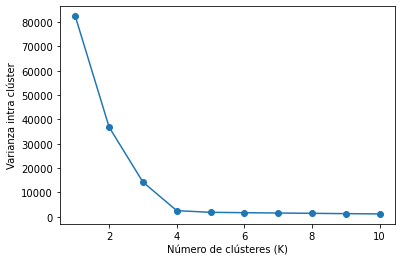

In [416]:
plt.plot(range(1, 11), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()


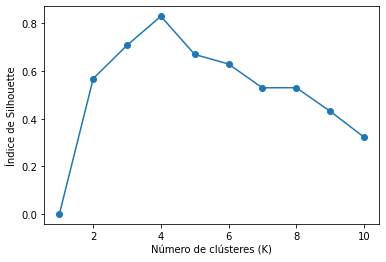

In [417]:
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

## Recursos

Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The elements of statistical learning: Data mining, inference, and prediction. New York: Springer.

Kaufman, L. & Rousseeuw, P. (1990). Finding Groups in Data: An Introduction to Cluster Analysis, Wiley, New York.

Macnaughton Smith, P., Williams, W., Dale, M. & Mockett, L. (1965). Dissimilarity analysis: a new technique of hierarchical subdivision, Nature 202: 1034–1035.

[Scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. 